# Storytelling Introduction

Imagine you’re a bright-eyed student from Dhaka, dreaming of the cobblestone streets of Munich or the sunlit campuses of Melbourne. You’ve heard stories of world-class lectures, bustling student cafés, and the chance to immerse yourself in new cultures. But as excitement builds, a pressing question looms: **How much will all this cost?**

This notebook follows your journey step by step. You’ll uncover hidden fees, compare tuition from Paris to Perth, and learn to forecast living expenses with confidence. By the end, you’ll have more than numbers—you’ll have a clear roadmap to plan your dream study-abroad adventure.

You’ve just received your university acceptance letter, and visions of cobblestone streets or sun-drenched campuses fill your mind. But excitement soon gives way to pressing questions: What will my true costs be? How do I secure a visa? Which documents matter most? This notebook guides you—like a seasoned mentor—from budget forecasting to touchdown in your new home.

![](https://i.ytimg.com/vi/u7isCOOwjz4/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLCq4wXWCus7BwqNinUcgXMrp4JeGw)
> last updated : 06.05.2025

> # 1. Dataset Overview Dataset Overview

* **Source:** Aggregated from UNESCO, OECD, Mercer, Numbeo, government portals, ISO insurance plans, and OANDA APIs
* **Columns:** Country, City, University, Program, Level, Duration\_Years, Tuition\_USD, Living\_Cost\_Index, Rent\_USD, Visa\_Fee\_USD, Insurance\_USD, Exchange\_Rate



In [1]:
# Import libraries for data analysis and visualization
import pandas as pd         # Data manipulation
import numpy as np          # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns      # Statistical data visualization
from scipy.stats import linregress     # Linear regression analysis
import geopandas as gpd     # Geographic data handling

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

> # 2. Loading the Data

In [2]:
df = pd.read_csv('/kaggle/input/cost-of-international-education/International_Education_Costs.csv')
df

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...
902,France,Strasbourg,University of Strasbourg,Data Analytics,Master,2.0,4000,70.2,1000,99,850,0.92
903,Malaysia,Nilai,USIM,Computer Science,Bachelor,3.0,6800,50.5,400,120,400,4.65
904,Saudi Arabia,Al-Ahsa,King Faisal University,Information Systems,Master,2.0,4200,64.2,600,200,800,3.75
905,USA,Seattle,University of Washington,Software Development,PhD,5.0,50000,77.8,2000,160,1500,1.00


> # 3. Pre-departure Planning

### 3.1 Essential Documents
1. **Passport & Validity:** Ensure ≥6 months validity beyond arrival date.
2. **Acceptance Letter & I-20/DS-2019:** Hand-carry originals; verify spelling & signatures.
3. **Visa Appointment Confirmation:** Book 2–4 months in advance.
4. **Health Records & Insurance:** Obtain required immunizations; purchase a plan covering at least $100,000 USD.



### 3.2 Packing & Logistics
* Local SIM/prepaid plan
* Emergency contacts & campus liaison numbers
* Currency: Carry at least \$500 USD in cash; set up a multi-currency card

### 3.4 Test Scores & Transcripts
* TOEFL/IELTS: minimum scores by university 
* GRE/GMAT: required for select graduate programs 
### 3.5 Essays & Recommendations
* Craft a Statement of Purpose highlighting fit and goals 
* Obtain 2–3 strong letters; request 1–2 months ahead




### 3.6 Cultural Adaptation & Well-being
1. **Pre-Departure Orientation:** Join alumni panels, virtual campus tours.
2. **Language & Social Clubs:** Enroll in conversational classes; attend international student mixers.
3. **Mental Health Resources:** Identify campus counseling services; schedule check-ins.



### 3.7 Post-arrival Tips
* **Banking:** Open local account within first week; compare student-friendly banks.
* **Transport:** Buy monthly transit passes; consider cycling if safety allows.
* **Networking:** Attend career fairs, join LinkedIn groups, leverage alumni networks.

> ###  Data Cleaning & Integration

Remove Missing & Zero Values: Drop rows where any cost-related field is null or zero to ensure data integrity:

In [3]:
cost_cols = ['Tuition_USD','Living_Cost_Index','Rent_USD','Visa_Fee_USD','Insurance_USD']
df = df.dropna(subset=cost_cols)
df = df[(df[cost_cols] != 0).all(axis=1)]

> # 4. Exploratory Analysis

### 4.1 Tuition Comparison by Country

In [4]:
# Average tuition by country
avg_tuition = df.groupby('Country')['Tuition_USD'].mean().sort_values(ascending=False)
avg_tuition.head()

Country
USA          47742.307692
Australia    34610.465116
Singapore    34172.222222
UK           30341.935484
Canada       29456.578947
Name: Tuition_USD, dtype: float64

### 4.2 Distribution of Tuition Fees

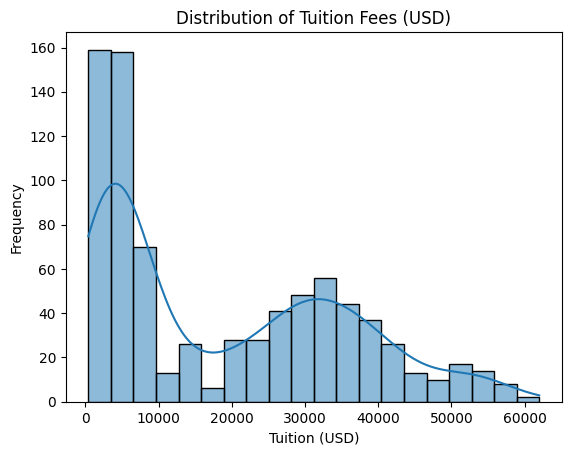

In [5]:
sns.histplot(df['Tuition_USD'], bins=20, kde=True)
plt.title('Distribution of Tuition Fees (USD)')
plt.xlabel('Tuition (USD)')
plt.ylabel('Frequency')
plt.show()

### 4.3 Distribution of Living Cost Index

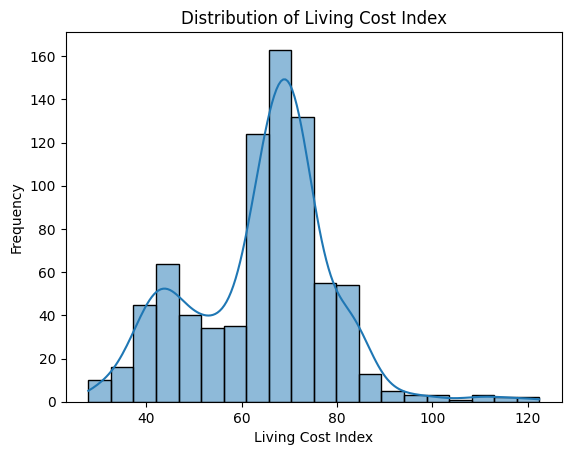

In [6]:
sns.histplot(df['Living_Cost_Index'], bins=20, kde=True)
plt.title('Distribution of Living Cost Index')
plt.xlabel('Living Cost Index')
plt.ylabel('Frequency')
plt.show()

### 4.4 Average Tuition Fee by Country

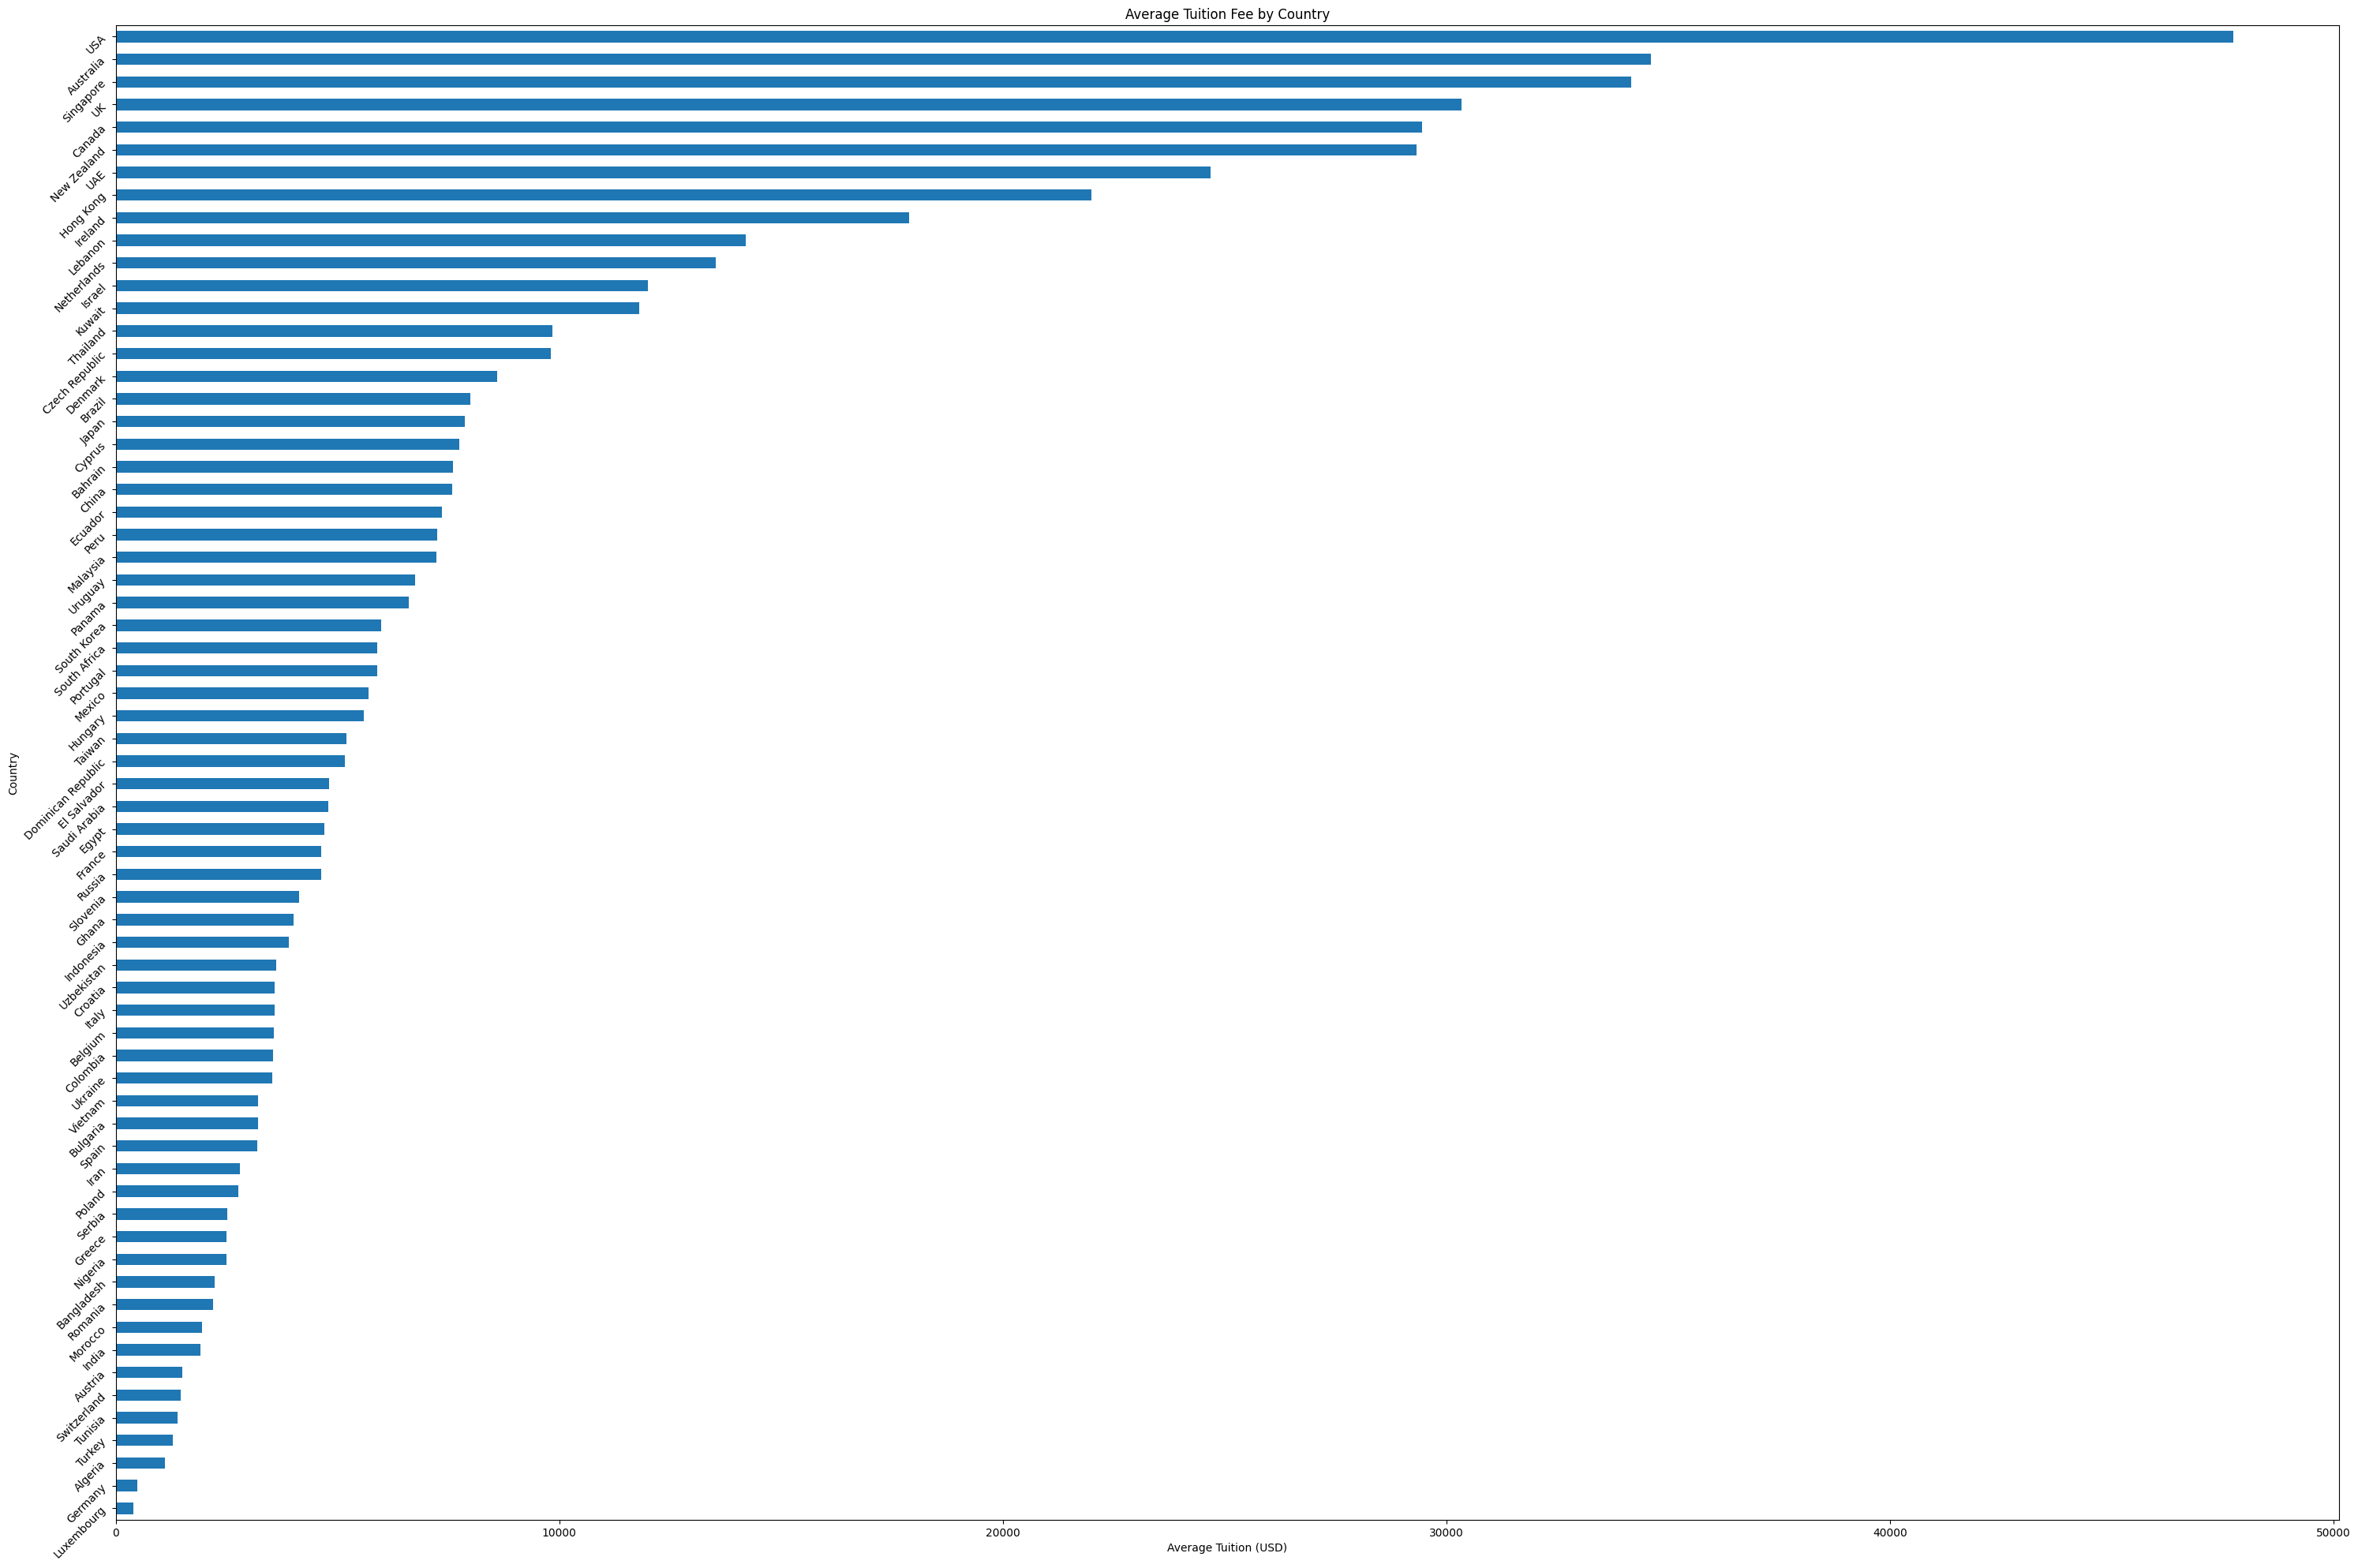

In [7]:
# Larger figure size for maximum clarity
plt.figure(figsize=(30, 20))
avg_tuition_county = df.groupby('Country')['Tuition_USD'].mean().sort_values()

# Plot with the larger figure size
avg_tuition_county.plot(kind='barh', figsize=(30, 20))
plt.title('Average Tuition Fee by Country')
plt.xlabel('Average Tuition (USD)')
plt.ylabel('Country')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.5 Average Tuition by Program and Level (Grouped Bar Plot)

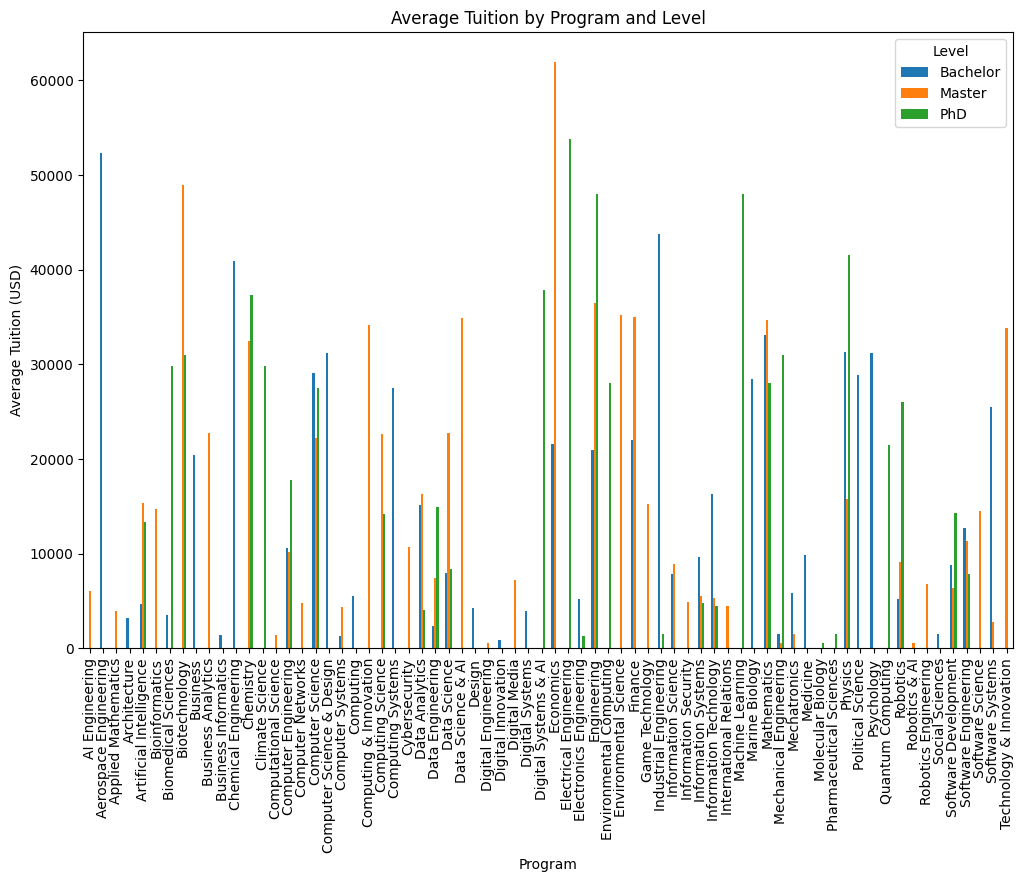

In [8]:
avg_tuition = df.groupby(['Program', 'Level'])['Tuition_USD'].mean().unstack()
avg_tuition.plot(kind='bar', figsize=(12,8))
plt.title('Average Tuition by Program and Level')
plt.xlabel('Program')
plt.ylabel('Average Tuition (USD)')
plt.legend(title='Level')
plt.show()

### 4.6 Boxplot of Tuition Fees for Different Programs

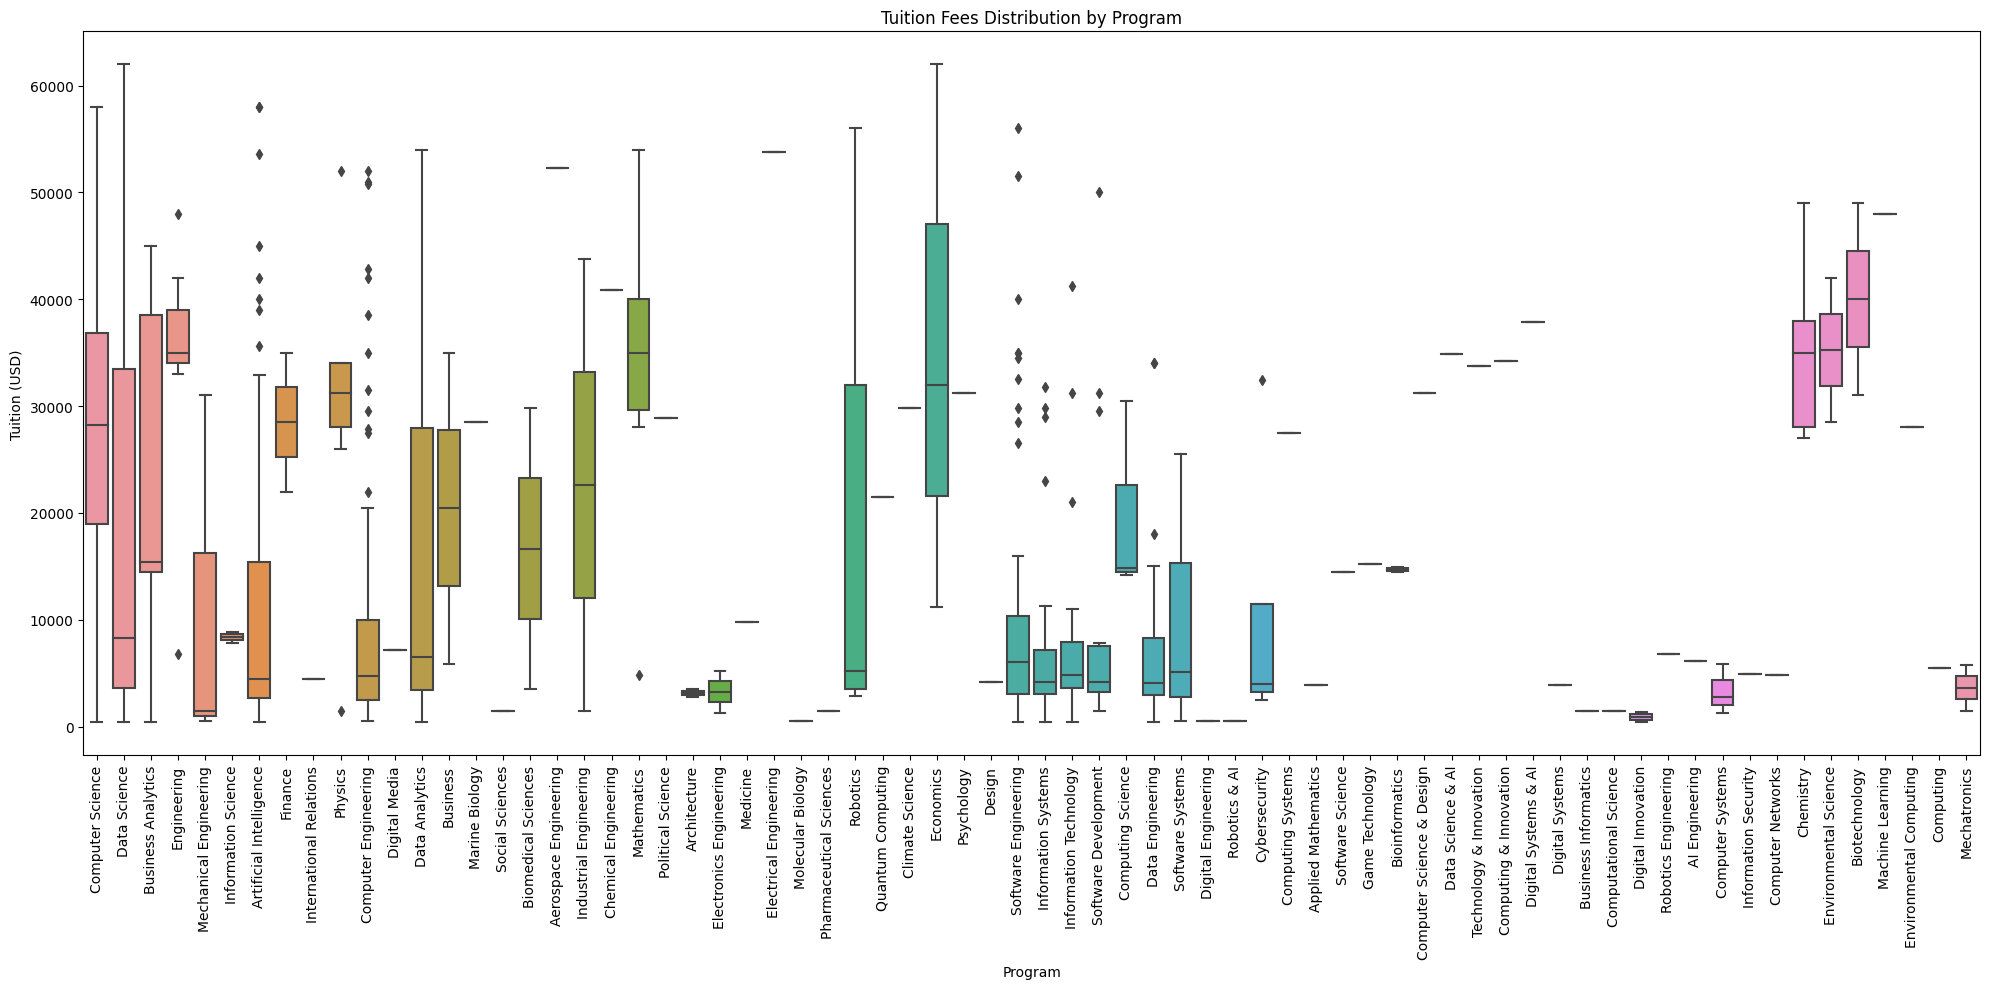

In [9]:
plt.figure(figsize=(20, 10))  # Increase figure size for better clarity
sns.boxplot(x='Program', y='Tuition_USD', data=df)
plt.title('Tuition Fees Distribution by Program')
plt.xlabel('Program')
plt.ylabel('Tuition (USD)')
plt.xticks(rotation=90)  # Rotate labels vertically
plt.tight_layout()  # Ensure layout fits into the figure area
plt.show()

### 4.7 Living vs. Rent Costs

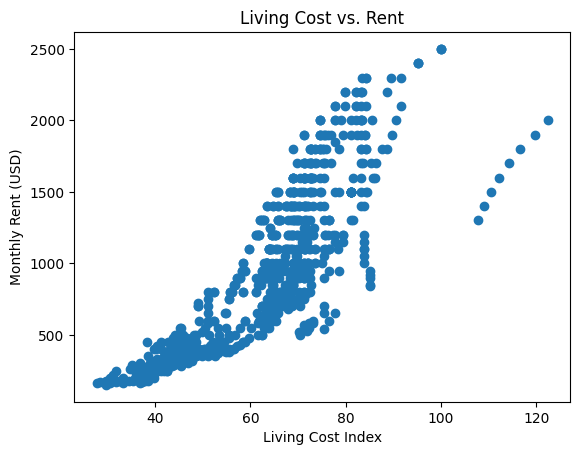

In [10]:
plt.scatter(df['Living_Cost_Index'], df['Rent_USD'])
plt.xlabel('Living Cost Index')
plt.ylabel('Monthly Rent (USD)')
plt.title('Living Cost vs. Rent')
plt.show()

> # 5. Budget Planning Tools

### 5.1 Estimated Annual Cost Calculator

In [11]:
def estimate_annual_cost(row):
    tuition = row['Tuition_USD'] / row['Duration_Years']
    living = row['Living_Cost_Index'] / 100 * 12000  # baseline $12k/year
    rent = row['Rent_USD'] * 12
    visa = row['Visa_Fee_USD']
    insurance = row['Insurance_USD']
    return tuition + living + rent + visa + insurance

# Apply to dataset

df['Estimated_Annual_Cost'] = df.apply(estimate_annual_cost, axis=1)
df[['University', 'Estimated_Annual_Cost']].sort_values(by='Estimated_Annual_Cost').head()

,University,Estimated_Annual_Cost
762,University of Carthage,6036.0
679,Mansoura University,6260.0
805,University of Tlemcen,6484.0
685,Aswan University,6506.0
748,University of Monastir,6516.0


> # 6. Visualizations

This section expands on key cost drivers and comparisons using richer plots:

### 6.1 Trends: Duration of Programs by Level (Count Plot

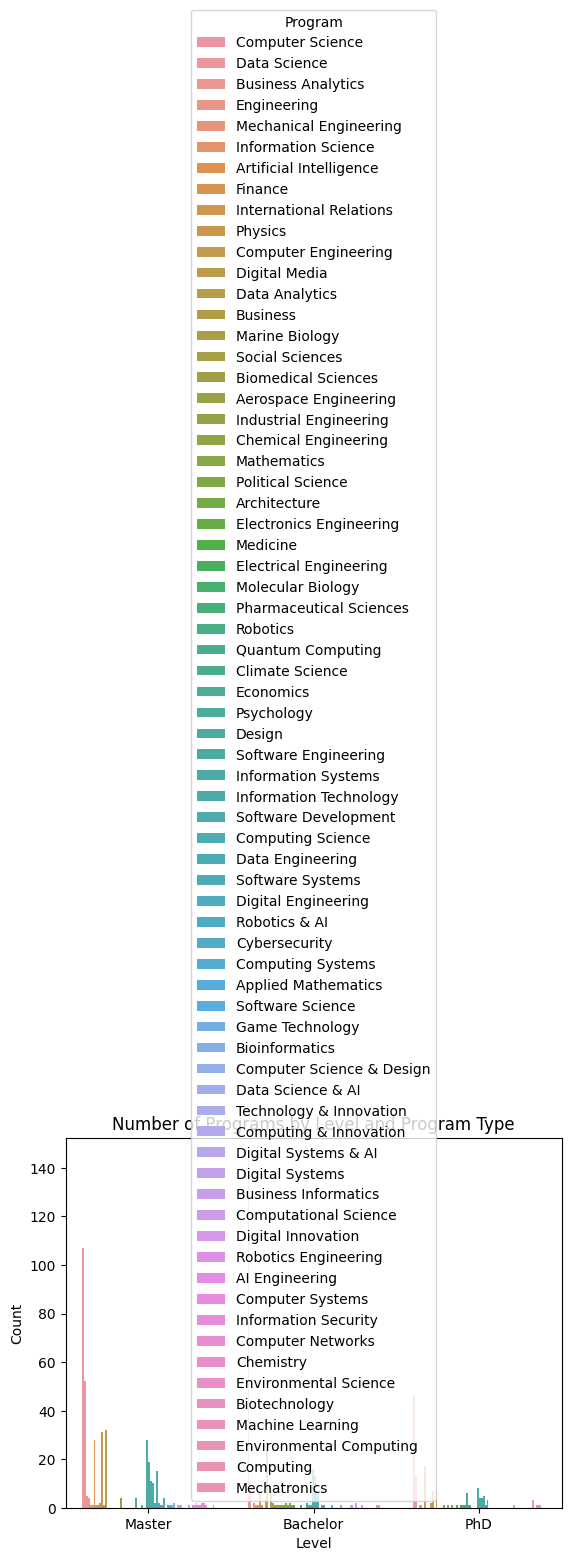

In [12]:
sns.countplot(x='Level', hue='Program', data=df)
plt.title('Number of Programs by Level and Program Type')
plt.xlabel('Level')
plt.ylabel('Count')
plt.legend(title='Program')
plt.show()

### 6.2 Tuition Distribution by Degree Level

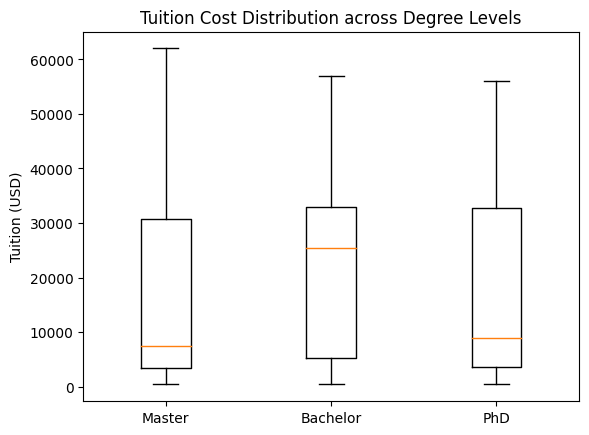

In [13]:
levels = df['Level'].unique()

data = [df[df['Level']==lvl]['Tuition_USD'] for lvl in levels]

plt.boxplot(data, labels=levels)
plt.ylabel('Tuition (USD)')
plt.title('Tuition Cost Distribution across Degree Levels')
plt.show()

### 6.3 Living Cost vs. Tuition Scatter with Regression

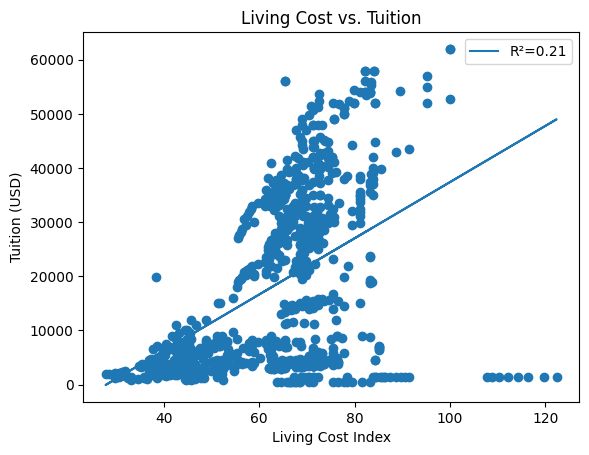

In [14]:
x = df['Living_Cost_Index']
y = df['Tuition_USD']

slope, intercept, r, p, stderr = linregress(x, y)

plt.scatter(x, y)
plt.plot(x, intercept + slope*x, label=f"R²={r**2:.2f}")
plt.xlabel('Living Cost Index')
plt.ylabel('Tuition (USD)')
plt.title('Living Cost vs. Tuition')
plt.legend()
plt.show()

### 6.4 Heatmap of Average Costs by Country & Level

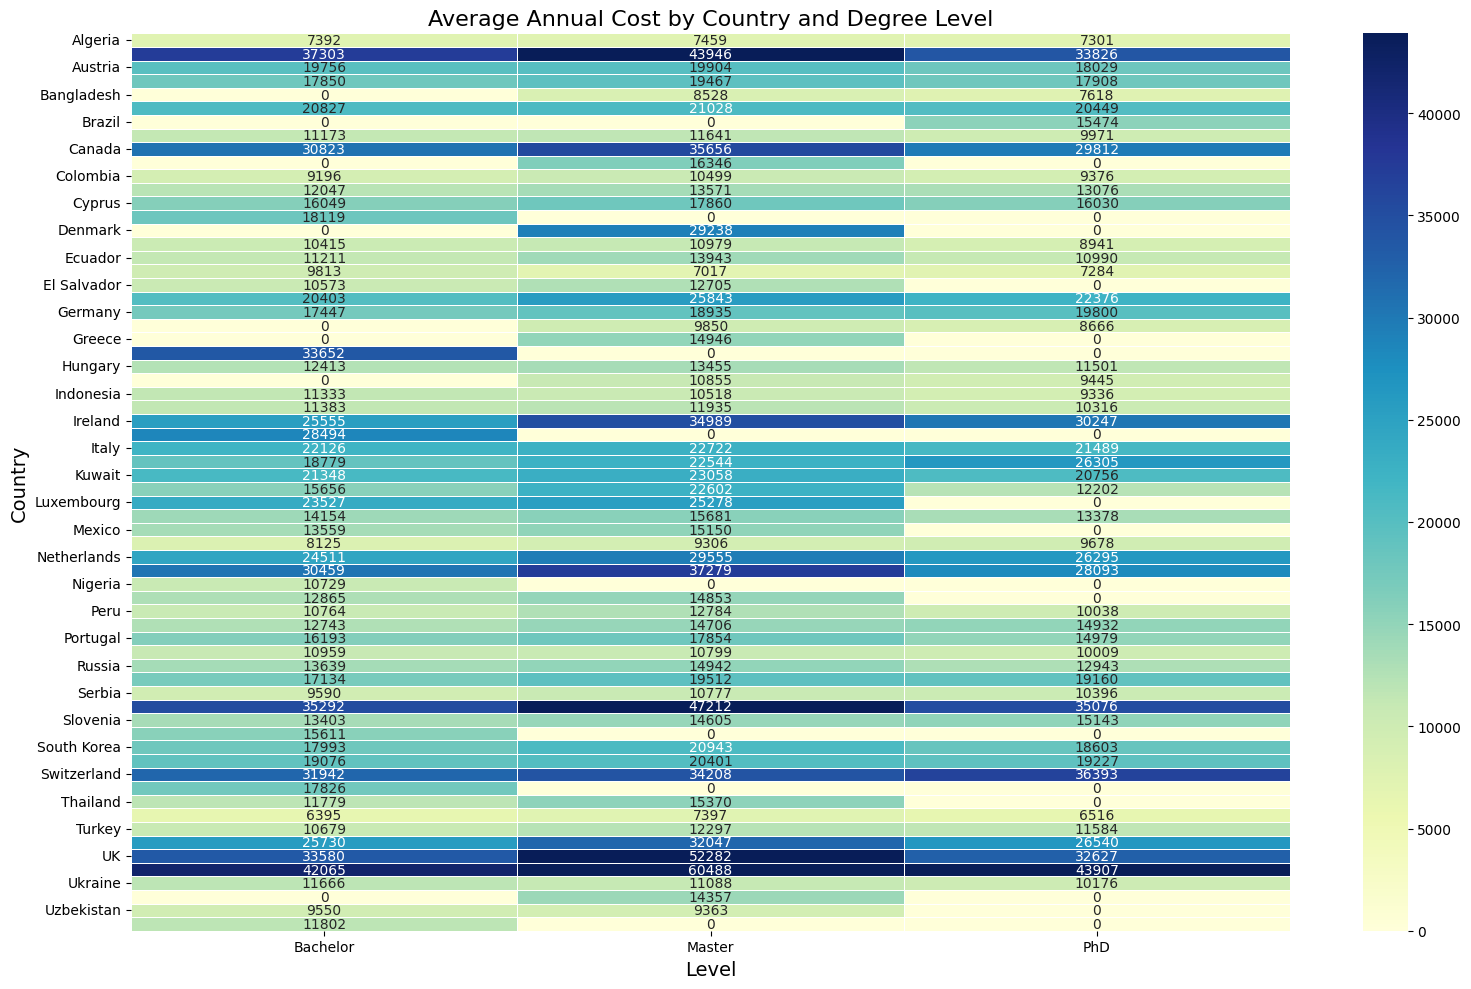

In [15]:
# pivot table of average estimated cost
pivot = df.pivot_table(
    values='Estimated_Annual_Cost',
    index='Country',
    columns='Level',
    aggfunc='mean'
).fillna(0)
plt.figure(figsize=(16, 10))
sns.heatmap(
    pivot,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    cbar=True,
    linecolor='white',
    linewidths=0.5,
    robust=True
)

plt.title('Average Annual Cost by Country and Degree Level', fontsize=16)
plt.xlabel('Level', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

### 6.5 Correlation Matrix of Cost Components

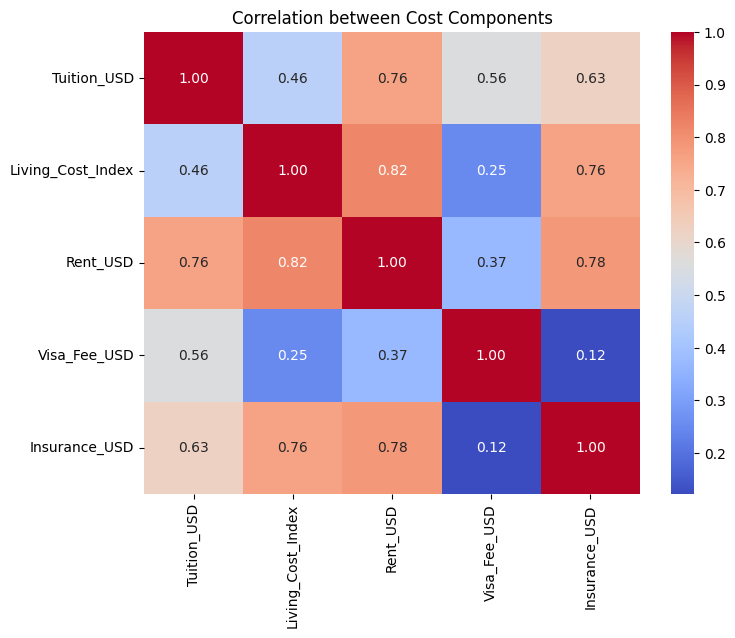

In [16]:
corr_components = df[['Tuition_USD','Living_Cost_Index','Rent_USD','Visa_Fee_USD','Insurance_USD']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_components, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between Cost Components')
plt.show()

### 6.6 Geographic Distribution of Estimated Costs

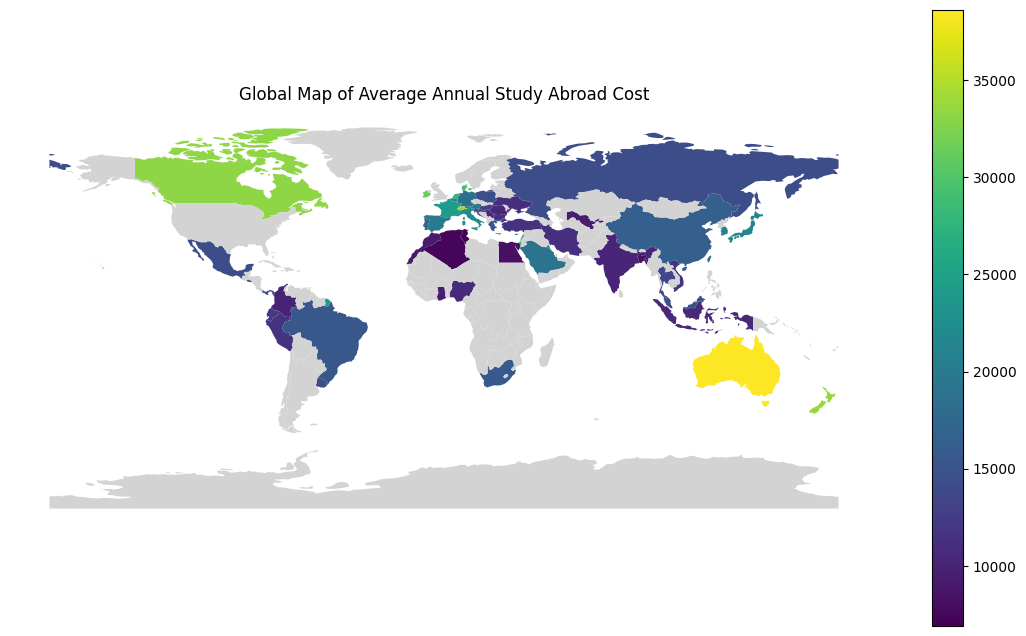

In [17]:
# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Compute average cost per country
country_cost = df.groupby('Country')['Estimated_Annual_Cost'].mean().reset_index()

# Merge with geodata
merged = world.merge(country_cost, left_on='name', right_on='Country', how='left')

# Plot
fig, ax = plt.subplots(1,1, figsize=(14,8))
merged.plot(column='Estimated_Annual_Cost', 
            ax=ax, 
            legend=True, 
            cmap='viridis', 
            missing_kwds={'color': 'lightgrey'})
ax.set_title('Global Map of Average Annual Study Abroad Cost')
ax.axis('off')
plt.show()

### 6.7 Cost Breakdown Pie Charts

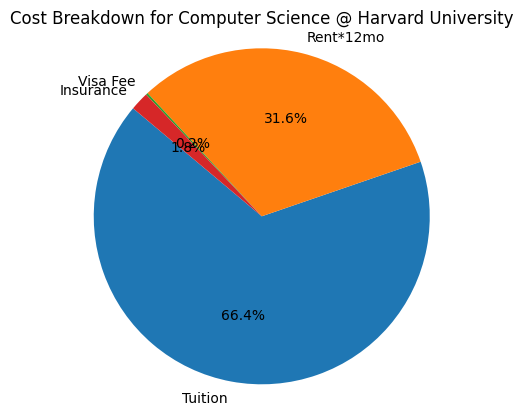

In [18]:
# Pie chart of cost component shares for a sample program
sample = df.loc[0, ['Tuition_USD','Rent_USD','Visa_Fee_USD','Insurance_USD']]
labels = ['Tuition','Rent*12mo','Visa Fee','Insurance']
sizes = [sample['Tuition_USD'], sample['Rent_USD']*12, sample['Visa_Fee_USD'], sample['Insurance_USD']]

import matplotlib.pyplot as plt

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f"Cost Breakdown for {df.loc[0,'Program']} @ {df.loc[0,'University']}")
plt.axis('equal')
plt.show()

### 6.8 Tuition vs. Program Duration

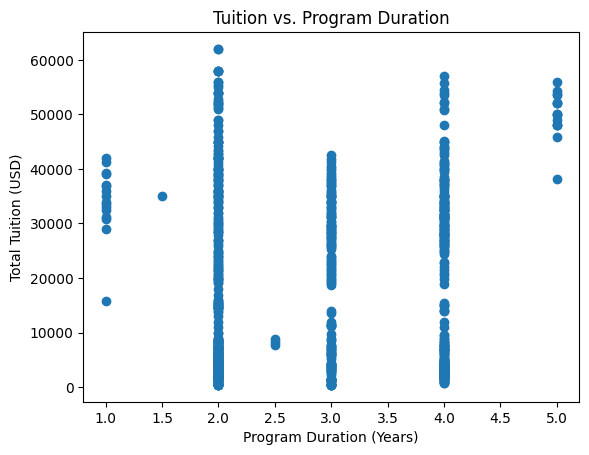

In [19]:
# Scatter plot of Tuition vs. Duration
import matplotlib.pyplot as plt
x = df['Duration_Years']
y = df['Tuition_USD']
plt.scatter(x, y)
plt.xlabel('Program Duration (Years)')
plt.ylabel('Total Tuition (USD)')
plt.title('Tuition vs. Program Duration')
plt.show()

### 6.9 Number of Programs per Level

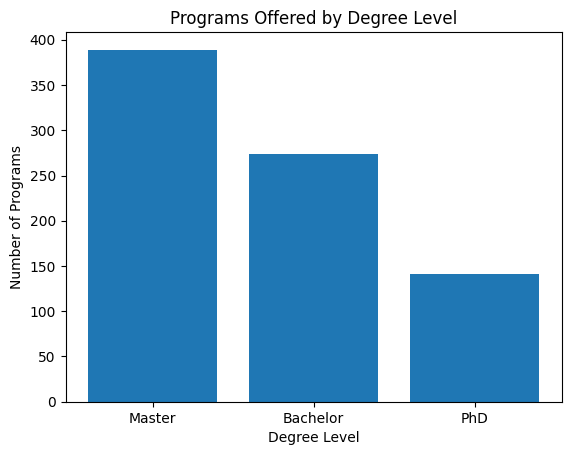

In [20]:
# Bar chart of program counts by level
grouped = df['Level'].value_counts()
import matplotlib.pyplot as plt

plt.bar(grouped.index, grouped.values)
plt.xlabel('Degree Level')
plt.ylabel('Number of Programs')
plt.title('Programs Offered by Degree Level')
plt.show()

### 6.10 Rent vs. Living Cost Index by Country

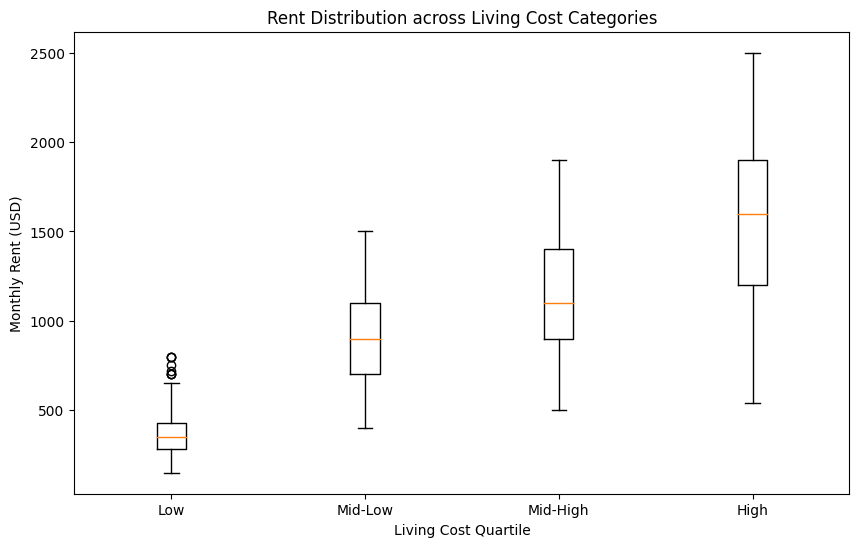

In [21]:
# Categorize living cost into quartiles
df['Cost_Quartile'] = pd.qcut(df['Living_Cost_Index'], 4, labels=['Low','Mid-Low','Mid-High','High'])
plt.figure(figsize=(10,6))

for quartile in df['Cost_Quartile'].unique():
    subset = df[df['Cost_Quartile']==quartile]
    plt.boxplot(subset['Rent_USD'], positions=[list(df['Cost_Quartile'].cat.categories).index(quartile)], labels=[quartile])

plt.xlabel('Living Cost Quartile')
plt.ylabel('Monthly Rent (USD)')
plt.title('Rent Distribution across Living Cost Categories')
plt.show()

# 7. Essential Considerations for Prospective Study-Abroad Students.

Beyond costs, successful planning requires attention to academic, legal, and personal elements:

1. **Admission & Language Requirements**

   * Standardized tests (e.g., IELTS/TOEFL, GRE/GMAT) and application deadlines.
   * Credential evaluation and transcript translation for non-native documents.

2. **Scholarships & Funding**

   * Government scholarships (e.g., Fulbright, Chevening, DAAD) and university-specific grants.
   * External funding: foundations, corporate sponsorships, and research assistantships.

3. **Visa & Immigration Compliance**

   * Processing times vary (2–4 months); prepare documents early.
   * Work-permit rules: typical 20 h/week limit on-campus, post-study options.

4. **Health, Insurance & Safety**

   * Mandatory health insurance plans: compare coverage tiers and out-of-pocket limits.
   * Register with local authorities, understand emergency services and campus resources.

5. **Accommodation & Transportation**

   * On-campus vs. off-campus housing trade-offs: cost, commute, community.
   * Public transit pass discounts for students; biking and ride-share options.

6. **Cultural & Academic Adaptation**

   * Orientation programs, language support, and student associations.
   * Time-zone differences: plan communication with family and mentors.

7. **Financial Management**

   * Opening local bank accounts, managing exchange fees, budgeting apps.
   * Part-time work to offset living costs—be aware of visa restrictions.

8. **Post-Graduation Planning**

   * Alumni networks, internship opportunities, and post-study work visas.
   * ROI analysis: compare long-term salary growth vs. total investment.

# 8 Abroad Living Cost Predictor

In [22]:
# Drop the 'Estimated_Annual_Cost' and 'Cost_Quartile' columns from DataFrame 'df'.
# - axis=1 indicates columns to drop
# - inplace=True modifies 'df' directly
# - errors='ignore' prevents errors if columns are not found
df.drop(['Estimated_Annual_Cost', 'Cost_Quartile'], axis=1, inplace=True, errors='ignore')

In [23]:
# Define a list of column names to be used for labeling later
# These columns are: 'Country', 'City', 'University', 'Program', 'Level'
lab_col=['Country', 'City', 'University', 'Program', 'Level']

In [24]:
# Import the LabelEncoder class from sklearn's preprocessing module
# - used to convert categorical variables into numerical labels
from sklearn.preprocessing import LabelEncoder

In [25]:
# Instantiate a LabelEncoder object
le = LabelEncoder()

In [26]:
# Loop through each column in 'lab_col'
for column in lab_col:
    # Apply fit_transform to each column
    # - converts categorical text data into numerical labels
    df[column] = le.fit_transform(df[column])

In [27]:
# Import necessary modules and functions for model selection, metrics, and models
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [28]:
# Create feature matrix 'X' by dropping the target column 'Living_Cost_Index' from the DataFrame 'df'
X = df.drop(['Living_Cost_Index'], axis=1)

# Create target vector 'y' containing the 'Living_Cost_Index' column
y = df['Living_Cost_Index']

In [29]:
# Split the data into training and testing sets
# - test_size=0.2 allocates 20% of data for testing
# - random_state=42 ensures reproducibility
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
# Define a dictionary 'models' with multiple regression model instances
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(verbosity=0)
}

In [31]:
# Initialize an empty list 'results' to store evaluation metrics for each model
results = []

# Loop through each model in the 'models' dictionary
for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Use the trained model to predict on the test data
    y_pred = model.predict(X_test)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mse)

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)

    # Append evaluation metrics and model name to 'results' list
    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

In [32]:
# Convert 'results' list of dictionaries into a pandas DataFrame
# and sort the rows based on 'R2 Score' in descending order
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)

# Print the sorted DataFrame to display model performance metrics
print(results_df)

              Model  R2 Score      MSE    RMSE     MAE
9           XGBoost    0.9765   4.0753  2.0187  1.4417
5      RandomForest    0.9764   4.0785  2.0195  1.4472
6  GradientBoosting    0.9752   4.2996  2.0735  1.5815
4      DecisionTree    0.9538   7.9932  2.8272  1.9267
7          AdaBoost    0.9119  15.2540  3.9056  3.1124
0  LinearRegression    0.8564  24.8555  4.9855  3.8872
1             Ridge    0.8564  24.8561  4.9856  3.8872
3        ElasticNet    0.8523  25.5564  5.0553  3.9551
2             Lasso    0.8484  26.2276  5.1213  4.0056
8        KNeighbors    0.8350  28.5471  5.3430  3.7029


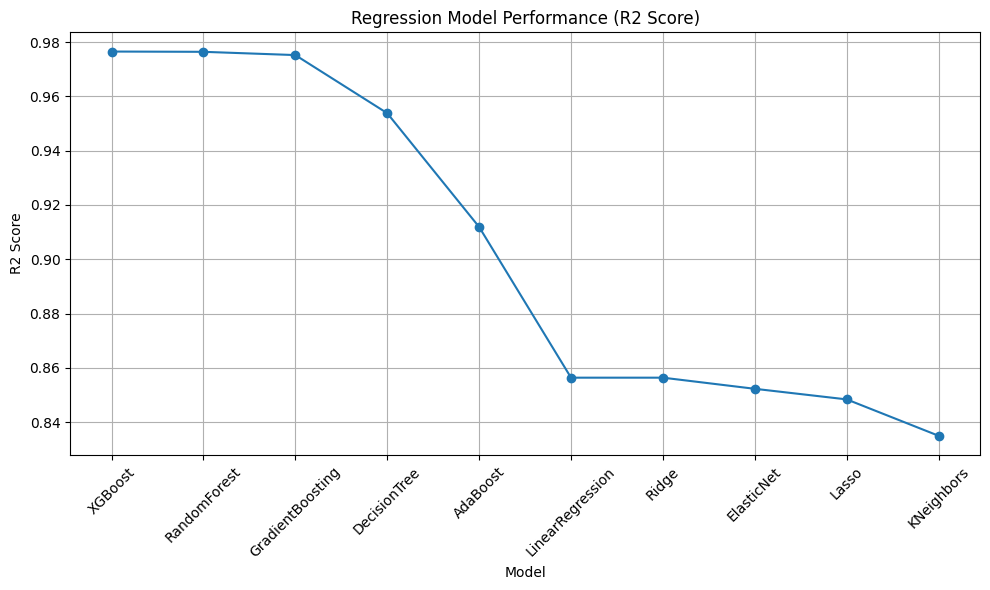

In [33]:
# Plotting: create a figure with size 10x6 inches
plt.figure(figsize=(10, 6))

# Plot the R2 Score for each model
# - Use different markers ('o') and a solid line ('-')
plt.plot(results_df['Model'], results_df['R2 Score'], marker='o', linestyle='-')

# Add a title to the plot
plt.title('Regression Model Performance (R2 Score)')

# Label the x-axis as 'Model'
plt.xlabel('Model')

# Label the y-axis as 'R2 Score'
plt.ylabel('R2 Score')

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add grid lines for better visualization
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### Connect with Me  

Feel free to follow me on these platforms:  

[![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/adilshamim8)  
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/adilshamim8)  
[![Twitter](https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://x.com/adil_shamim8)  